In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# y = w * x + b 함수
def myfunc(_x):
  w = 1.3 # 기울기
  b = 2.6 # y 절편.  점(0, 2.6)
  # x 절편은 점(-2, 0)이 됨.
  _y = w * _x + b
  noise = random.random() * 0.01    # Noise
  return _y + noise

In [3]:
# random.random() -- 0.0 ~ 1.0
NUM_DATA = 100          # 데이터 갯수
XVALUE = 5              # X값의 범위 (0.0 ~ 5.0)
# type: python list
xlist = [random.random() * XVALUE for i in range(NUM_DATA)]
xlist.sort()            # sorting
ylist = [myfunc(x) for x in xlist]
xtest = [random.random() * XVALUE for i in range(NUM_DATA)]
xtest.sort()
ytest = [myfunc(x) for x in xtest]
print('xlist :',xlist)
print('ylist :',ylist)
print('type(xlist) :', type(xlist))
print('type(ylist) :', type(ylist))

xlist : [0.0015005400924700263, 0.12110966750208063, 0.12186579649274332, 0.17166394095864845, 0.17301136886147483, 0.21865150171783032, 0.26484339442407134, 0.37539115444439886, 0.42010261451764674, 0.45129526082447746, 0.5482131331126977, 0.6106905462578277, 0.6673903733514863, 0.683649100643065, 0.8195552809554818, 0.9309805696188045, 1.0635238949191423, 1.1309625466989692, 1.151851164846653, 1.2934550869033523, 1.3179795304124435, 1.3346006767556973, 1.3795360229690639, 1.4216006235756469, 1.4388125250236334, 1.520376074319758, 1.6314342733745912, 1.7298619881666055, 1.7630563002192652, 1.767779462138298, 1.7756772609313427, 1.8098551077868645, 1.9328046580633795, 1.9695253997318152, 2.005536720488056, 2.0245530433485053, 2.06247858494251, 2.157493262161661, 2.1721826588882203, 2.187117564935421, 2.2036788921374577, 2.355629365437697, 2.46513700509582, 2.4933829304996937, 2.5012212589471132, 2.5109793392748614, 2.5312142243957854, 2.5708931463854166, 2.6358333126952695, 2.718887816

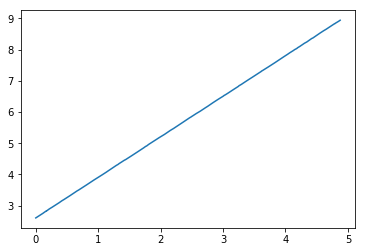

In [4]:
# actual data 산점도
fig, ax = plt.subplots()
ax.plot(xlist, ylist, label='actual')
plt.show()

In [5]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xlist = np.array(xlist)
ylist = np.array(ylist)
print('xlist.shape :',xlist.shape)  # shape ==  (10,)
print('ylist.shape :',ylist.shape)  # shape ==  (10,)
xtest = np.array(xtest)
ytest = np.array(ytest)

xlist.shape : (100,)
ylist.shape : (100,)


In [6]:
# tensor 에 맞추기 위해 reshape
xlist = xlist.reshape((NUM_DATA, 1))
ylist = ylist.reshape((NUM_DATA, 1))
print('xlist.shape :', xlist.shape) # shape ==  (10,1)
print('ylist.shape :', ylist.shape) # shape ==  (10,1)
xtest = xtest.reshape((NUM_DATA, 1))
ytest = ytest.reshape((NUM_DATA, 1))

xlist.shape : (100, 1)
ylist.shape : (100, 1)


In [7]:
X = tf.placeholder(tf.float32, [None, 1], name='inputPlace')
y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([1,1], -1, 1), name='weight')
b = tf.Variable(tf.random_normal([1], -1, 1), name='bias')
O = tf.matmul(X, W) + b   # [1,1]행렬 x [1,1]행렬 + [1]

In [8]:
# 손실 함수
cost_function = tf.reduce_mean(tf.square(O - y))
# 옵티마이저
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
training = optimizer.minimize(cost_function)

# 옵티마이저
optimizer2 = tf.train.AdamOptimizer(learning_rate=0.1)
training2 = optimizer.minimize(cost_function)

print('X : ', X.name)

X :  inputPlace:0


In [9]:
# loss list
see_loss_summary = []           # Record accuracy values for plot
see_loss_summary2 = []           # Record accuracy values for plot

In [10]:
# Session 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())
BATCH_SIZE = int(NUM_DATA / 10) # 한번의 training에 넣는 데이터의 개수.  10
for i in range(50):
    for batch in range(int(2000 / BATCH_SIZE)): # 200
        batch_x = xlist[batch * BATCH_SIZE : (1+batch) * BATCH_SIZE]
        batch_y = ylist[batch * BATCH_SIZE : (1+batch) * BATCH_SIZE]

        res_training, cost_val  = sess.run([training, cost_function],
                                             feed_dict={X: batch_x, y:batch_y})
        # if cost_val < 0.0000001:
        #     break

    see_loss = sess.run([cost_function],
                        feed_dict={X: xtest, y: ytest})
    res_o, res_w, res_b = sess.run([O, W, b], feed_dict={X: xtest, y: ytest})

    print('LOSS', see_loss, end=' ')
    print('W', res_w, 'bias', res_b)

    see_loss_summary.append(see_loss)

sess.run(tf.global_variables_initializer())
for i in range(50):
    for batch in range(int(2000 / BATCH_SIZE)):  # 200
        batch_x = xlist[batch * BATCH_SIZE: (1 + batch) * BATCH_SIZE]
        batch_y = ylist[batch * BATCH_SIZE: (1 + batch) * BATCH_SIZE]

        res_training, cost_val = sess.run([training2, cost_function],
                                          feed_dict={X: batch_x, y: batch_y})
        # if cost_val < 0.0000001:
        #     break

    see_loss = sess.run([cost_function],
                        feed_dict={X: xtest, y: ytest})
    res_o, res_w, res_b = sess.run([O, W, b], feed_dict={X: xtest, y: ytest})

    print('LOSS', see_loss, end=' ')
    print('W', res_w, 'bias', res_b)

    see_loss_summary2.append(see_loss)

LOSS [1.6513003] W [[ 1.52446675]] bias [ 0.77891612]
LOSS [1.3041825] W [[ 1.36993623]] bias [ 1.28549814]
LOSS [0.65398127] W [[ 1.33577299]] bias [ 1.70483208]
LOSS [0.34598491] W [[ 1.3084507]] bias [ 1.99488628]
LOSS [0.18904981] W [[ 1.28951585]] bias [ 2.19776464]
LOSS [0.10831607] W [[ 1.27627206]] bias [ 2.33956051]
LOSS [0.066018999] W [[ 1.26701283]] bias [ 2.43866992]
LOSS [0.0433455] W [[ 1.26054919]] bias [ 2.50794673]
LOSS [0.03087409] W [[ 1.25603056]] bias [ 2.55636525]
LOSS [0.023816518] W [[ 1.25286114]] bias [ 2.590204]
LOSS [0.019679923] W [[ 1.25065279]] bias [ 2.61386108]
LOSS [0.017184051] W [[ 1.24910676]] bias [ 2.63039589]
LOSS [0.015626449] W [[ 1.24803257]] bias [ 2.6419549]
LOSS [0.014637747] W [[ 1.24727452]] bias [ 2.65003037]
LOSS [0.013989649] W [[ 1.24674797]] bias [ 2.65567732]
LOSS [0.013555466] W [[ 1.2463851]] bias [ 2.65962505]
LOSS [0.013269532] W [[ 1.24612296]] bias [ 2.6623795]
LOSS [0.013068693] W [[ 1.2459482]] bias [ 2.66430879]
LOSS [0.01

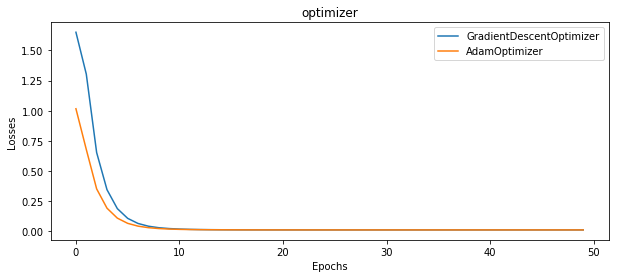

In [11]:
# Plot the accuracy and cost summaries
f, ax1 = plt.subplots(1, 1, sharex=True, figsize=(10,4))

ax1.plot(see_loss_summary,  label='GradientDescentOptimizer')    # GradientDescentOptimizer
ax1.plot(see_loss_summary2, label='AdamOptimizer')                 # green AdamOptimizer
ax1.set_title('optimizer')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()